In [2]:

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
import os
import sys
print(os.getcwd())
os.environ.update(os.environ)
        # Add a new environment variable to the operating system
os.environ["RAMP_HOME"] = os.getcwd()
# Print the environment variables to verify that the new variable was added
print(os.environ["RAMP_HOME"])
# sys.path.append('../')
sys.path.append('ramp-code/')


/home/annazan/fAIr-utilities
/home/annazan/fAIr-utilities


In [ ]:
# import cv2

In [6]:
os.environ["SM_FRAMEWORK"] = "tf.keras"
import ramp.utils
import hot_fair_utilities
# base_path = f"{os.getcwd()}/ramp-data/sample_2"
base_path = "/Users/azanchetta/fAIr-utilities/ramp-data/1_Zanzibar"

ModuleNotFoundError: No module named 'solaris.eval'

In [7]:
from hot_fair_utilities import preprocess
model_input_image_path = f"{base_path}/input"
preprocess_output=f"{base_path}/preprocessed"
preprocess(
            input_path = model_input_image_path,
            output_path = preprocess_output,
            rasterize=True,
            rasterize_options=["binary"],
            georeference_images=True,
        )

Clipping labels for input: 100%|██████████| 963/963 [02:05<00:00,  7.66it/s]


In [8]:
from hot_fair_utilities import train

variables are /Users/azanchetta/fAIr-utilities/ramp-data/1_Zanzibar/preprocessed
 and /Users/azanchetta/fAIr-utilities/ramp-data/1_Zanzibar/train
gggStarting to prepare data for training
ramp home is /Users/azanchetta/fAIr_GPU
python home is None
variables are: src /Users/azanchetta/fAIr-utilities/ramp-data/1_Zanzibar/preprocessed
 and dst:/Users/azanchetta/fAIr-utilities/ramp-data/1_Zanzibar/train


Writing /Users/azanchetta/fAIr-utilities/ramp-data/1_Zanzibar/train/fair_split_train.csv
Writing /Users/azanchetta/fAIr-utilities/ramp-data/1_Zanzibar/train/fair_split_val.csv


done split
Data is ready for training
Metric constructor function: get_sparse_categorical_accuracy_fn
Model: importing saved model /Users/azanchetta/fAIr_GPU/ramp-code/ramp/checkpoint.tf
Starting Training with 4 epochs , 2 batch size , 409 steps per epoch , 72 validation steps......
Epoch 1/4


2023-11-16 15:42:35.235264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype string and shape [819]
	 [[{{node Placeholder/_9}}]]
2023-11-16 15:42:35.235758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype string and shape [819]
	 [[{{node Placeholder/_9}}]]
2023-11-16 15:42:49.924593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


409/409 [==============================] - ETA: 0s - loss: 0.1674 - sparse_categorical_accuracy: 0.9551

2023-11-16 15:50:12.314756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype string and shape [144]
	 [[{{node Placeholder/_9}}]]
2023-11-16 15:50:12.315272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype string and shape [144]
	 [[{{node Placeholder/_9}}]]
2023-11-16 15:50:13.628241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-16 15:50:45.520672: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an 

INFO:tensorflow:Assets written to: /Users/azanchetta/fAIr-utilities/ramp-data/1_Zanzibar/train/model-checkpts/20231116-154221/model_20231116-154221_001_0.966.tf/assets


INFO:tensorflow:Assets written to: /Users/azanchetta/fAIr-utilities/ramp-data/1_Zanzibar/train/model-checkpts/20231116-154221/model_20231116-154221_001_0.966.tf/assets
2023-11-16 15:51:19.204296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [144]
	 [[{{node Placeholder/_0}}]]
2023-11-16 15:51:19.204763: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [144]
	 [[{{node Placeholder/_0}}]]
2023-11-16 15:51:20.212730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is 

409/409 [==============================] - 529s 1s/step - loss: 0.1674 - sparse_categorical_accuracy: 0.9551 - val_loss: 0.1079 - val_sparse_categorical_accuracy: 0.9658
Epoch 2/4
409/409 [==============================] - ETA: 0s - loss: 0.0814 - sparse_categorical_accuracy: 0.9757

2023-11-16 15:58:53.419513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,?]
	 [[{{node inputs}}]]
2023-11-16 15:58:53.527077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,?]
	 [[{{node inputs}}]]
2023-11-16 15:58:53.634155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,?]
	 [[{{node inputs}}]]
2023-11-16

INFO:tensorflow:Assets written to: /Users/azanchetta/fAIr-utilities/ramp-data/1_Zanzibar/train/model-checkpts/20231116-154221/model_20231116-154221_002_0.973.tf/assets


INFO:tensorflow:Assets written to: /Users/azanchetta/fAIr-utilities/ramp-data/1_Zanzibar/train/model-checkpts/20231116-154221/model_20231116-154221_002_0.973.tf/assets
2023-11-16 15:59:26.482907: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype string and shape [144]
	 [[{{node Placeholder/_9}}]]
2023-11-16 15:59:26.483371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype string and shape [144]
	 [[{{node Placeholder/_9}}]]


409/409 [==============================] - 484s 1s/step - loss: 0.0814 - sparse_categorical_accuracy: 0.9757 - val_loss: 0.0861 - val_sparse_categorical_accuracy: 0.9734
Epoch 3/4
409/409 [==============================] - ETA: 0s - loss: 0.0845 - sparse_categorical_accuracy: 0.9730

2023-11-16 16:07:02.286017: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,?]
	 [[{{node inputs}}]]
2023-11-16 16:07:02.410289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,?]
	 [[{{node inputs}}]]
2023-11-16 16:07:02.535681: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,?]
	 [[{{node inputs}}]]
2023-11-16

INFO:tensorflow:Assets written to: /Users/azanchetta/fAIr-utilities/ramp-data/1_Zanzibar/train/model-checkpts/20231116-154221/model_20231116-154221_003_0.974.tf/assets


INFO:tensorflow:Assets written to: /Users/azanchetta/fAIr-utilities/ramp-data/1_Zanzibar/train/model-checkpts/20231116-154221/model_20231116-154221_003_0.974.tf/assets
2023-11-16 16:07:30.487451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype string and shape [144]
	 [[{{node Placeholder/_9}}]]
2023-11-16 16:07:30.487824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype string and shape [144]
	 [[{{node Placeholder/_9}}]]


409/409 [==============================] - 483s 1s/step - loss: 0.0845 - sparse_categorical_accuracy: 0.9730 - val_loss: 0.0825 - val_sparse_categorical_accuracy: 0.9744
Epoch 4/4
409/409 [==============================] - ETA: 0s - loss: 0.0914 - sparse_categorical_accuracy: 0.9709

2023-11-16 16:11:34.749869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype string and shape [144]
	 [[{{node Placeholder/_9}}]]
2023-11-16 16:11:34.750316: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [144]
	 [[{{node Placeholder/_0}}]]


409/409 [==============================] - 244s 598ms/step - loss: 0.0914 - sparse_categorical_accuracy: 0.9709 - val_loss: 0.0922 - val_sparse_categorical_accuracy: 0.9735
Training Finished , Time taken to train : 1740.9984833319998 seconds
Generating graphs ....
Graph generated at : /Users/azanchetta/fAIr-utilities/ramp-data/1_Zanzibar/train/graphs
extracting highest accuracy model
/Users/azanchetta/fAIr-utilities/ramp-data/1_Zanzibar/train/model-checkpts/20231116-154221
model_20231116-154221_003_0.974.tf


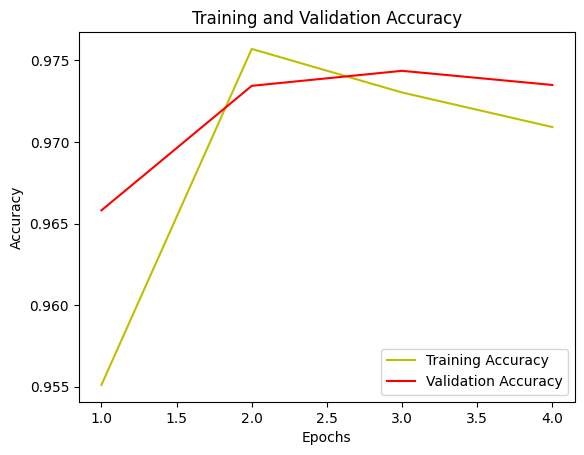

In [16]:
train_output = f"{base_path}/train"
final_accuracy, final_model_path = train(
    input_path=preprocess_output,
    output_path=train_output,
    epoch_size=4,
    batch_size=2,
    model="ramp",
    model_home=os.environ["RAMP_HOME"]
)

# here a tf file is created (weights + structure)

In [17]:
print(final_accuracy,final_model_path)

97.39999999999999 /Users/azanchetta/fAIr-utilities/ramp-data/1_Zanzibar/train/model-checkpts/20231116-154221/model_20231116-154221_003_0.974.tf


In [19]:
from hot_fair_utilities import predict
prediction_output = f"{base_path}/prediction/output"
predict(
    checkpoint_path=final_model_path,
    input_path=f"{base_path}/prediction/input",
    prediction_path=prediction_output,
)

Using : /Users/azanchetta/fAIr-utilities/ramp-data/1_Zanzibar/train/model-checkpts/20231116-154221/model_20231116-154221_003_0.974.tf
It took 12 sec to load model


2023-11-16 17:44:27.591916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
It took 4 sec to predict with 0.5 Confidence Threshold


Georeferencing for output: 100%|██████████| 3/3 [00:00<00:00, 29.51it/s]

It took 0 sec to georeference


In [21]:
from hot_fair_utilities import polygonize
geojson_output= f"{prediction_output}/prediction.geojson"
polygonize(
    input_path=prediction_output, 
    output_path=geojson_output,
    remove_inputs = True,
)

100%|██████████| 3/3 [00:00<00:00, 227.22mask/s]
ERROR:fiona._env:PROJ: proj_create_from_database: /usr/local/anaconda3/envs/fairgpu/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
Merging components: 100%|██████████| 16/16 [00:01<00:00,  8.54component/s]
